# Think Python

## Chapter 13 - Case study: data structure selection

### 13.1 Word frequency analysis

*HTML of this chapter in "Think Python 2e" can be found [here](http://greenteapress.com/thinkpython2/html/thinkpython2014.html "Chapter 13").*

#### Exercise 1  

*Write a program that reads a file, breaks each line into words, strips whitespace and punctuation from the words, and converts them to lowercase.*

*Hint: The `string` module provides a string named whitespace, which contains space, tab, newline, etc., and `punctuation` which contains the punctuation characters. Let’s see if we can make Python swear:*

```
>>> import string
>>> string.punctuation
'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
```

*Also, you might consider using the string methods `strip`, `replace` and `translate`.*


In [1]:
import string



def get_words_from_file(text, encode = "utf8"):
    """
    Returns a list of words from a file.  Words
    are stripped of punctuation and converted to lowercase.
    Since punctuation is removed, contractions are returned
    without apostrophes (e.g., `can't` -> `can t`). Numbers
    are also removed from the returned list
    
    Arguments:
    
    text: name of file
    encode: text encoding used in file.  Default is UTF-8
    """
    punct = string.punctuation

    # Some PG texts use non-ASCII characters, so we'll add these manually.
    punct += '‘’“”—'

    # Some PG texts also have line numbers, so let's remove all numbers:
    punct += string.digits

    out = " " * len(punct)
    
    opened_text = open(text, 'r', encoding = encode)
    t = []
    for line in opened_text:
        translation = line.maketrans(punct, out)
        for word in line.translate(translation).split():
            t.append(word.strip().lower())
            
    return t

In [3]:
ma = get_words_from_file('alice.txt')
ma[1:25]

['through',
 'the',
 'looking',
 'glass',
 'by',
 'lewis',
 'carroll',
 'chapter',
 'i',
 'looking',
 'glass',
 'house',
 'one',
 'thing',
 'was',
 'certain',
 'that',
 'the',
 'white',
 'kitten',
 'had',
 'had',
 'nothing',
 'to']

#### Exercise 2  

*Go to Project Gutenberg (http://gutenberg.org) and download your favorite out-of-copyright book in plain text format.*

*Modify your program from the previous exercise to read the book you downloaded, skip over the header information at the beginning of the file, and process the rest of the words as before.*

*Then modify the program to count the total number of words in the book, and the number of times each word is used.*

*Print the number of different words used in the book. Compare different books by different authors, written in different eras. Which author uses the most extensive vocabulary?*

*__I had difficulty removing the boilerplate at the beginning of Project Gutenberg texts, as I felt that the book didn't do an adequate job in showing us how to remove headers and footers.  So I went online to see how other people dealt with this problem.  At [this blog](https://epequeno.wordpress.com/2012/05/06/exercise-13-2/ "Removing headers from PG texts") I found some interesting code for removing the header of PG texts; but the creator of the code had yet to deal with the footer, so I made a few changes to deal with that.__*

*__In addition, as I worked my way through the chapter and analyzed various PG texts, I noticed there is tremendous variance in how authors used punctuation, especially inside words.  I therefore added some code to `clean_pg_text` to allow the user some choice in how to handle 'internal punctuation' - i.e., punctuation marks inside strings that are not removed by `str.strip()`. `remove_internal` is an optional argument that allows the user to designate characters inside strings that should be removed. `remove_internal` is paired with `replace_internal`, a list of characters to replace the removed characters. Both `remove_internal` and `replace_internal` have to have the same length. This function uses `assert`, which has yet to be introduced.__*

In [4]:
import string



def clean_pg_text(text, encode = "utf8", remove_internal = [], 
                  replace_internal = []):
    """
    Returns a list of words from a Project Gutenberg text.  
    Headers and footers are removed from texts. Words
    are stripped of punctuation and converted to lowercase.
    Punctuation inside words is preserved, except those
    characters specified in remove_internal. 
    Numbers are also removed from the returned list
    
    Arguments:
    
    text: name of file
    encode: text encoding used in file. Default is UTF-8
    remove_internal: user-defined internal characters to be replaced. 
        `word.strip` will not remove punctuation inside strings,
        so these are cleaned in a separate step. Default is an empty list.
    replace_internal: user-defined characters to replace the characters
        in remove_internal.  Default is an empty list.  replace_internal
        and remove_internal must have the same length.
    """
    assert len(remove_internal) == len(replace_internal), "remove_internal and replace_internal must have the same number of items"
    
    stripped = string.punctuation

    # Some PG texts use non-ASCII quotes, so we'll add these manually.
    stripped += '‘’“”'

    # Some PG texts also have line numbers, so let's remove all numbers:
    stripped += string.digits

    # And we won't need whitespace
    stripped += string.whitespace
    
    opened_text = open(text, 'r', encoding = encode)
    cleaned_text = []
    flag = False
    start = "*** START OF"
    end = "*** END OF"

    # some PG texts don't use spaces to designate start/end of text
    alt_start = "***START OF"
    alt_end = "***END OF"
    
    for line in opened_text:
        
        # start reading in lines after boilerplate
        if ((start in line) or (alt_start in line)) and flag == False:
            flag = True
        
        # return word list once boilerplate has been reached
        elif ((end in line) or (alt_end in line)) and flag == True:
            return cleaned_text
        elif flag == True:
                
                # replacing user designated characters
                # this is done before the line is split, since 
                # most words joined by hyphens are two separate words
                for char1, char2 in zip(remove_internal, replace_internal):
                    line = line.replace(char1, char2)
                for word in line.split():
                    word = word.strip(stripped).lower()
                    cleaned_text.append(word)
                
        else:
            pass
    
    return cleaned_text

In [5]:
def tally_words(text_list):
    """
    Returns a tally of the words in text_list.
    """
    total_words = {}

    for word in text_list:
        total_words[word] = 1 + total_words.get(word, 0)

    return total_words

In [6]:
texts = ['austen.txt', 'beowulf.txt', 'canterbury.txt', 
         'hamlet.txt', 'iliad.txt', 'sherlock.txt', 'ulysses.txt']

titles = ["'Pride and Prejudice' by Jane Austen",
          "'Beowulf' translated by Lesslie Hall",
          "'The Canterbury Tales' by Geoffrey Chaucer",
          "'Hamlet' by William Shakespeare",
          "'The Iliad of Homer', translated by Alexander Pope",
          "'The Adventures of Sherlock Holmes' by Arthur Conan Doyle",
          "'Ulysses' by James Joyce"]

In [7]:
for text, title in zip(texts, titles):
    clean = clean_pg_text(text)
    tally = tally_words(clean)
    print("{} uses {:,} words".format(title, len(tally)))

'Pride and Prejudice' by Jane Austen uses 6,783 words
'Beowulf' translated by Lesslie Hall uses 6,715 words
'The Canterbury Tales' by Geoffrey Chaucer uses 15,910 words
'Hamlet' by William Shakespeare uses 4,920 words
'The Iliad of Homer', translated by Alexander Pope uses 13,577 words
'The Adventures of Sherlock Holmes' by Arthur Conan Doyle uses 8,401 words
'Ulysses' by James Joyce uses 30,468 words


#### Exercise 3  

*Modify the program from the previous exercise to print the 20 most frequently used words in the book.*

In [8]:
def n_most_common_words(text, n, encode = "utf8", remove_internal = [], 
                  replace_internal = []):
    """
    Returns a list of the n most common words in a 
    Project Gutenberg text. encode, remove_internal, and 
    replace_interal are optional arguments that may be
    passed on to the clean_pg_text function.
    """
    
    clean = clean_pg_text(text, encode, remove_internal, replace_internal)
    tally = tally_words(clean)
    
    sorted_words = []
    
    for (y, z) in reversed(sorted(zip(tally.values(), tally.keys()))):
        sorted_words.append([z, y])
        
    return sorted_words[:n]

In [9]:
n_most_common_words('ulysses.txt', 20)

[['the', 14838],
 ['of', 8135],
 ['and', 7147],
 ['a', 6462],
 ['to', 4949],
 ['in', 4914],
 ['he', 3996],
 ['his', 3326],
 ['that', 2571],
 ['i', 2553],
 ['with', 2510],
 ['it', 2336],
 ['was', 2125],
 ['on', 2107],
 ['for', 1925],
 ['you', 1845],
 ['her', 1783],
 ['him', 1522],
 ['is', 1409],
 ['all', 1311]]

#### Exercise 4  

*Modify the previous program to read a word list (see Section 9.1) and then print all the words in the book that are not in the word list. How many of them are typos? How many of them are common words that should be in the word list, and how many of them are really obscure?*

In [10]:
# modified from code in ex. 12.4

def make_word_dict(text):
    """
    Reads lines from text and 
    returns a dictionary.
    """
    d = {}
    for line in text:   
        d[line.strip().lower()] = None
    to_add = ["i", "a"]
    for ta in to_add:
        d[ta] = None
    return d

def find_words_not_in_dict(text, t, encode = "utf8", remove_internal = [], 
                  replace_internal = []):
    """
    Takes a Project Gutenberg text and a
    wordlist and returns a list of words
    in the PG text that cannot be found
    in the list.
    
    Arguments:
    text: a raw Project Gutenberg text file
    t: a raw text word list with one word per line
    
    encode, remove_internal, and 
    replace_interal are optional arguments that may be
    passed on to the clean_pg_text function.
    """
    check_dict = make_word_dict(t)
    clean = clean_pg_text(text, encode, remove_internal, replace_internal)
    tally = tally_words(clean)
    not_in_dict = []
    for word in tally.keys():
        if word not in check_dict:
            not_in_dict.append(word)

    return not_in_dict

In [11]:
fin = open('words.txt')
austen_obscura = find_words_not_in_dict('austen.txt', fin)
austen_obscura[:35]

['austen',
 '',
 'neighbourhood',
 'mr',
 'netherfield',
 'mrs',
 'england',
 'monday',
 'michaelmas',
 'bingley',
 'grown-up',
 'william',
 'lucas',
 'over-scrupulous',
 'lizzy',
 'good-humoured',
 'lydia',
 'three-and-twenty',
 'elizabeth',
 "don't",
 "heaven's",
 'to-morrow',
 "fortnight's",
 'neices',
 'mary',
 "i'm",
 "bennet's",
 'ways--with',
 'second-hand',
 'neighbour',
 'favourable',
 'delightful',
 "bingley's",
 'etc',
 'hertfordshire']

*__Most of the words not in the word list are proper names.  A number of British spellings also make an appearance, as well as some words that seem common enough that their absence in the wordlist is a bit surprising (e.g., 'monday', 'delightful', 'unreserved', etc...). I believe the word list was compiled for crossword answers, so this fact may explain their absence.   However, in some texts the results were words with punctuation that had not been cleaned by the function `clean_pg_text`.  I therefore went back to the function and added those characters to the list of ones that should be replaced.__*

*__Running the code again, this time removing hyphens from inside of words:__*

In [12]:
fin = open('words.txt')
austen_obscura = find_words_not_in_dict('austen.txt', fin, 
                                        remove_internal=['-'],
                                        replace_internal=[' '])
austen_obscura[:35]

['austen',
 '',
 'neighbourhood',
 'mr',
 'netherfield',
 'mrs',
 'england',
 'monday',
 'michaelmas',
 'bingley',
 'william',
 'lucas',
 'lizzy',
 'lydia',
 'elizabeth',
 "don't",
 "heaven's",
 "fortnight's",
 'neices',
 'mary',
 "i'm",
 "bennet's",
 'neighbour',
 'favourable',
 'delightful',
 "bingley's",
 'etc',
 'hertfordshire',
 'london',
 'gentlemanlike',
 'hurst',
 'darcy',
 'derbyshire',
 'unreserved',
 'behaviour']

#### Exercise 5  

*Write a function named `choose_from_hist` that takes a histogram as defined in Section 11.2 and returns a random value from the histogram, chosen with probability in proportion to frequency. For example, for this histogram:*

```
>>> t = ['a', 'a', 'b']
>>> hist = histogram(t)
>>> hist
{'a': 2, 'b': 1}
```

*your function should return 'a' with probability 2/3 and 'b' with probability 1/3.*

In [13]:
import random

# from chapter 11

def histogram(s):
    d = dict()
    for c in s:
        d[c] = 1 + d.get(c, 0)

    return d

def choose_from_hist(h):
    """
    Returns a random item from histogram h.
    Probability item will be chosen is based on 
    frequency within the histogram. 
    """
    
    t = []
    for k, v in h.items():
        for i in range(v):
            t.append(k)

    return random.choice(t)

In [14]:
h = histogram(['a', 'a', 'b'])

In [15]:
for i in range(12):
    print(choose_from_hist(h), end = " ")

b a a a a b a b a a b a 

### 13.3  Word histogram

*These are the functions from the book, and the results they would return:*

In [16]:
import string

def process_file(filename):
    hist = dict()
    # I added this so we can process newer PG files
    fp = open(filename, encoding = "utf8")
    for line in fp:
        process_line(line, hist)
    return hist

def process_line(line, hist):
    line = line.replace('-', ' ')
    
    for word in line.split():
        word = word.strip(string.punctuation + string.whitespace)
        word = word.lower()
        hist[word] = hist.get(word, 0) + 1
        
hist = process_file('emma.txt')

def total_words(hist):
    return sum(hist.values())

def different_words(hist):
    return len(hist)

# technical name for 'total words' is 'tokens'
print('Total number of tokens:', total_words(hist))

# technical name for 'different words' is 'word types'
print('Number of word types:', different_words(hist))

Total number of tokens: 162742
Number of word types: 7460


*__One problem with the above code is that is doesn't remove the boilerplate at the beginning of the text, and yes, the [text posted on the html version of "Think Python 2e"](http://greenteapress.com/thinkpython2/code/emma.txt "emma.txt") has boilerplate, at least when I wrote this.  If we download a new version of the plain text format of "Emma" and rerun the analysis with the code in this notebook, we'll get different results, as my code will clean out the boilerplate:__*

In [17]:
clean = clean_pg_text('emma_new.txt')
tally = tally_words(clean)

# technical name for this is number of tokens
print('Total number of tokens:', total_words(tally))

# technical name for this is word types
print('Number of word types:', different_words(tally))

Total number of tokens: 157457
Number of word types: 10056


*__The number of distinct word types is still very high, which I'm hypothesizing is due to the number of hyphenated words.  Let's try it again, replacing internal hyphens with spaces, so that these hyphenated words will be recorded as their constituent parts:__*

In [18]:
clean = clean_pg_text('emma_new.txt', remove_internal=['-'], 
                      replace_internal=[' '])
tally = tally_words(clean)

# technical name for this is number of tokens
print('Total number of tokens:', total_words(tally))

# technical name for this is word types
print('Number of word types:', different_words(tally))

Total number of tokens: 161057
Number of word types: 7207


*__This is the result I expected: there are fewer tokens and word types than in the author's analysis, which is due to the fact that I removed the boilerplate from my version.__*

### 13.4 Most common words

*Code from the book:*

In [19]:
def most_common(hist):
    t = []
    for key, value in hist.items():
        t.append((value, key))
        
    t.sort(reverse = True)
    return t

In [20]:
t = most_common(hist)
print('The most common words are:')
for freq, word in t[:10]:
    print(word, freq, sep = '\t')

The most common words are:
to	5295
the	5266
and	4931
of	4339
i	3191
a	3155
it	2546
her	2483
was	2400
she	2364


#### Exercise 6  

*Python provides a data structure called set that provides many common set operations. You can read about them in Section 19.5, or read the documentation at http://docs.python.org/3/library/stdtypes.html#types-set.*

*Write a program that uses set subtraction to find words in the book that are not in the word list.*

In [21]:
def subtract(d1, d2):
    return set(d1) - set(d2)

In [22]:
missing = subtract(hist, fin)

In [23]:
list(missing)[:50]

['',
 'sources',
 'manners',
 'understanding',
 'file',
 'workbags',
 'books',
 'obtruding',
 'offences',
 'recital',
 'straightforward',
 'discipline',
 'candles',
 'committed',
 'awkward',
 'niece',
 'unsullied',
 'secondary',
 'march',
 'ensued',
 'bandied',
 'affix',
 'interposed',
 'urged',
 'remonstrances',
 'hannah',
 'luckiest',
 'confusion',
 'teazed',
 'afterwards',
 '158',
 'pursuit',
 'recollections',
 'setting',
 'etext92',
 'confirmed',
 'renounced',
 'prevails',
 'speeches',
 'marriage',
 'animating',
 'coxe',
 'impolite',
 'sneers',
 'dealings',
 'entertaining',
 'repetitions',
 'vicarage',
 'machines',
 'preference']

*__We get some interesting results if we use this function to compare the text of "Emma" from the author's website with a text I downloaded from the Project Gutenberg website.__*

In [24]:
hist = process_file('emma.txt')
hist_new = process_file('emma_new.txt')

In [25]:
missing = subtract(hist, hist_new)

In [26]:
len(missing)

193

In [27]:
list(missing)[:50]

['xxxxx10x.xxx',
 'cd',
 'illinois',
 'p',
 'print!**for',
 'equivalent',
 'titles',
 'type',
 'cellery',
 'etexts**start',
 'scrambles',
 'dating',
 'sue',
 'clifton',
 'ebcdic',
 'emma10.txt',
 'benedictine',
 'stockings',
 'enemies',
 'charles',
 '5093',
 'tel',
 'kramer',
 'teazed',
 'midnight',
 'deposit',
 'aimable',
 'sizes',
 'ascii',
 'conveniences',
 'converted',
 'humans',
 'etext92',
 'mysteriously',
 'hart@uiucvmd',
 'uninterruptedly',
 'central',
 'contacting',
 'audience',
 'honor',
 'machines',
 'attmail',
 'text',
 'payable',
 'your@login',
 'readers',
 'confidant',
 'etext/etext93',
 'wretch',
 'preliminary']

*__Set subtraction only shows us elements in the first set that aren't in the second.  From the list above, we can see that the text at the author's website clearly has some boilerplate, and that the boilerplate attached to the raw text files at PG has changed over time.__*

*__What would happen if we reserved the arguments?__*

In [28]:
missing2 = subtract(hist_new, hist)
len(missing2)

1638

In [29]:
list(missing2)[:50]

['“encouragement',
 '“_i',
 'amiable.”',
 'match!”',
 'asserted,”',
 'heart.”',
 'seat;”',
 'often.”',
 'creature?”',
 'us?”',
 'entity',
 '“business',
 '“most',
 'windy.”',
 'disagree.”',
 'then?”',
 'lines!”',
 'acquainted?”',
 "state's",
 'considerably.”',
 'accessed',
 'perry,”',
 'employ,”',
 'dressed.”',
 'indeed,”',
 'exempt',
 '“me',
 'campbell,”',
 'days.”',
 'honour,”',
 'sure.”',
 'head,”',
 'office.”',
 'favour.”',
 '1.e',
 '“a',
 'exporting',
 'hope,”',
 'book”',
 'astonishing!”',
 'right,”',
 'no,”',
 '“but',
 '“such',
 '“almost',
 'http://pglaf.org/donate',
 'given.”',
 'u.s',
 'party.”',
 '1.e.5']

*__It seems clear that newer text versions from PG have more boilerplate than older versions.__*

*__Using just the newer PG version of "Emma", what are the differences in the results of the author's code and mine?__*

In [30]:
missing3 = subtract(hist_new, tally)
len(missing3)

1746

In [31]:
list(missing3)[:50]

['file',
 '“encouragement',
 '“_i',
 'amiable.”',
 'match!”',
 'asserted,”',
 'heart.”',
 'seat;”',
 'often.”',
 'creature?”',
 'us?”',
 'entity',
 '“business',
 '“most',
 'windy.”',
 'disagree.”',
 'then?”',
 'lines!”',
 'acquainted?”',
 '158',
 "state's",
 'license',
 'considerably.”',
 'accessed',
 'perry,”',
 'employ,”',
 'dressed.”',
 'indeed,”',
 'exempt',
 '“me',
 'campbell,”',
 'days.”',
 'honour,”',
 'sure.”',
 'head,”',
 'office.”',
 'favour.”',
 '1.e',
 '“a',
 'exporting',
 'hope,”',
 'book”',
 'astonishing!”',
 'right,”',
 'no,”',
 '“but',
 '“such',
 '“almost',
 'http://pglaf.org/donate',
 'given.”']

In [32]:
# examining the reverse: i.e., words in the result of my code, but not
# in the result of the author's

missing4 = subtract(tally, hist_new)
len(missing4)

48

In [33]:
list(missing4)

['confidant',
 'drugs',
 'wretch',
 "se'nnight",
 'beheld',
 'polish',
 'suffers',
 'dirt',
 'dating',
 'nonsensical',
 'clifton',
 'unmarried',
 'york',
 'stockings',
 'apiece',
 'intellect',
 'wretches',
 'enemies',
 'battle',
 'abolition',
 'mermaids',
 'hum',
 'th',
 'rd',
 'midnight',
 'middling',
 'irksome',
 'affords',
 'deposit',
 'regulated',
 'conveniences',
 'ox',
 'mysteriously',
 'oftentimes',
 'carries',
 "men's",
 'curse',
 'uninterruptedly',
 'influenza',
 'beavers',
 'tan',
 "do's",
 'gainer',
 'dispositions',
 'grievously',
 'sunshine',
 'scoundrel',
 'stands']

In [34]:
# 'influenza' was not in the results of the author's code run over 
# a newer version of the text of "Emma".

'influenza' in hist_new

False

In [35]:
# But it is in the results of the code run over the text available at 
# the author's website

'influenza' in tally

True

*__Since we have the raw text, it is very easy to search for the string in question.  Here is the word "influenza" in the text the author provided:__*

> "How sorry I am!  But colds were never so prevalent as they have been
this autumn.  Mr. Wingfield told me that he has never known them
more general or heavy--except when it has been quite an _influenza_."

*__And in the version I just downloaded from PG:__*

> “How sorry I am! But colds were never so prevalent as they have been
this autumn. Mr. Wingfield told me that he has never known them more
general or heavy--except when it has been quite an _influenza_.”

*__The texts appear to be identical, but if we look closely, we'll notice that the quotes are not the same.  The version on the author's site uses straight double quotes (`"`), whereas the version I downloaded uses curly double quotes (`”`).__*

*__If we do a little more experimenting, it appears that the author's code does not deal well with words that appear next to curly quotes, and leaves them out of the histogram.  I verified this by looking at the number of occurrences of 'season', which ends the next quote in the book:__*

In [36]:
hist["season"]

6

In [37]:
hist_new["season"]

5

*__And the number of occurrences of 'middling', which begins a quote several paragraphs down from the paragraph in question (the intervening paragraphs all began with common words, which would not be ideal for analysis):__* 

In [38]:
hist["middling"]

1

*__As expected, 'middling' did not appear at all in the analysis of the newer version of the text.__* (I will not run the command in the next cell, as it makes it difficult for me to run all of the cells in the notebook.)

```
hist_new["middling"]

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<ipython-input-91-7ff134642164> in <module>
----> 1 hist_new["middling"]

KeyError: 'middling'
```

*__Time does not permit me to go back and make adjustments to the author's code.  Let me just say that text wrangling can be a very difficult problem, and the issue of smart quotes vs. dumb quotes appears to be a frequent one.__*

### 13.7 Random words

#### Exercise 7  

*Write a program that uses this algorithm to choose a random word from the book:*

<ol>
    <li><i>Use `keys` to get a list of the words in the book.</i></li>
    <li><i>Build a list that contains the cumulative sum of the word frequencies (see Exercise 2). The last item in this list is the total number of words in the book, $n$.</i></li>
    <li><i>Choose a random number from 1 to $n$. Use a bisection search (See Exercise 10) to find the index where the random number would be inserted in the cumulative sum.</i></li>
    <li><i>Use the index to find the corresponding word in the word list.</i></li></ol>


In [39]:
import random

def calc_cum_totals_from_hist(h):
    """
    Takes a histogram, calculates the cumulative 
    sums of the values in the histogram, and 
    returns a list of tuples of the cumulative 
    sums and the corresponding words.
    """
    
    cum_words = []
    cum_value = 0
    for k, v in h.items():
        cum_value += v
        cum_words.append((cum_value, k))
        
    return cum_words

def create_random_position(cum_words):
    """
    Take a cumulatively-summed list of words and returns
    a random position within that list.
    """
    
    return random.randint(0, cum_words[-1][0])

def choose_random_word_with_bisect(cum_words, rand):
    """
    Takes a cumulatively-summed list of words and
    a random number and iteratively searches the list
    to return the word that would be represented by that
    random number.
    """    
    mp = len(cum_words) // 2
    
    if mp == 1:
        return cum_words[0][1]
    
    
    if cum_words[mp - 1][0] < rand < cum_words[mp][0]:
        return cum_words[mp-1][1]
    elif cum_words[mp][0] < rand < cum_words[mp + 1][0]:
        return cum_words[mp][1]
    elif rand < cum_words[mp][0]:
        return choose_random_word_with_bisect(cum_words[:mp], rand)
    else:
        return choose_random_word_with_bisect(cum_words[mp + 1:], rand)
    
def choose_random_word_from_pg_book(text, encode = "utf8", 
                                    remove_internal = [], 
                                    replace_internal = []):
    """
    Returns a random word from a text.
    
    Arguments:
    text: raw text
    encode: optional character encoding of the text
    remove_internal: optional parameter that decides how strings
                    in the text are divided into words.
    replace_internal: optional parameter that designates how 
                    characters removed with remove_internal are
                    replaced. Length of remove_internal and 
                    replace_internal must be equal, so if 
                    characters are to be removed with 
                    remove_internal, there must be one empty
                    string ('') in replace_internal for each
                    character in remove_internal.
                    
    """
    clean = clean_pg_text(text)
    tally = tally_words(clean)
    cum_words = calc_cum_totals_from_hist(tally)
    rand = create_random_position(cum_words)
    return choose_random_word_with_bisect(cum_words, rand)

In [40]:
clean = clean_pg_text('ulysses.txt')
tally = tally_words(clean)
cum_words = calc_cum_totals_from_hist(tally)

In [41]:
cum_words[0]

(17, 'produced')

In [42]:
for i in range(10):
    print(choose_random_word_from_pg_book('ulysses.txt'))

equine
perpetuity
editors
horsepoliceman
brasses
darem
morning
sphincter
—come
foaming


### 13.8  Markov analysis

#### Exercise 8  

*Markov analysis:*

<ol>
<li><i>Write a program to read a text from a file and perform Markov analysis. The result should be a dictionary that maps from prefixes to a collection of possible suffixes. The collection might be a list, tuple, or dictionary; it is up to you to make an appropriate choice. You can test your program with prefix length two, but you should write the program in a way that makes it easy to try other lengths.</i></li>

<li><i>Add a function to the previous program to generate random text based on the Markov analysis. Here is an example from Emma with prefix length 2:</i>

> *He was very clever, be it sweetness or be angry, ashamed or only amused, at such a stroke. She had never thought of Hannah till you were never meant for me?" "I cannot make speeches, Emma:" he soon cut it all himself.*


<i>For this example, I left the punctuation attached to the words. The result is almost syntactically correct, but not quite. Semantically, it almost makes sense, but not quite.</i>

<i>What happens if you increase the prefix length? Does the random text make more sense?</i></li>
<br>

<li><i>Once your program is working, you might want to try a mash-up: if you combine text from two or more books, the random text you generate will blend the vocabulary and phrases from the sources in interesting ways.</i></li></ol>


*__First, I made alterations to `clean_pg_text` so that the resulting list would have strings that retained punctuation and capitalization, as this is necessary for a more natural looking text. Then I made a function to compile ngrams, which are groups of words that occurred in the text.  After that, I made a dictionary that would store all possible ngrams that followed the words in the text. Then I wrote a function that would choose one of these ngrams.  Finally, I put it all together into a function that would generate Markov texts.__*

In [43]:
# Parts 1 & 2

import string, random

def parse_PG_text(text):
    """
    Returns a list of words from a Project Gutenberg text.  
    Header and footer is removed. 
    Punctuation and capitalization are preserved. 
    """
    
    cleaned_text = []
    opened_text = open(text, encoding = "utf8")
    
    # to remove legal boilerplate
    flag = False
    start = "*** START OF"
    end = "*** END OF"

    # some PG texts don't use spaces to designate start/end of text
    alt_start = "***START OF"
    alt_end = "***END OF"
    
    for line in opened_text:
        
        # start reading in lines after boilerplate
        if ((start in line) or (alt_start in line)) and flag == False:
            flag = True
        
        # return word list once boilerplate has been reached
        elif ((end in line) or (alt_end in line)) and flag == True:
            return cleaned_text
        elif flag == True:
    
            for word in line.split():
                cleaned_text.append(word.strip(string.whitespace))
        else:
            pass
        
    return cleaned_text

def make_ngram(array, index, n):
    """
    Returns a list of the n words following
    the word at the indexed point in the array.
    """
    ngram = []
    for j in range(1, n + 1):
        ngram.append(array[index + j])
    
    return ngram

def make_markov_dict(array, n):
    """
    Takes a list of words and returns a dictionary
    of all possible ngrams following each word in the array.
    """
    
    d = {}
    l = len(array)
    
    # adding padding so function doesn't crash at end of array
    array.extend(" " * n)
    
    for e in range(l):
        ngram = make_ngram(array, e, n)
        if array[e] not in d:
            d[array[e]] = ([ngram])
        else:
            d[array[e]] += ([ngram])
        
    # dictionary values for items at the end of the array
    # will have empty strings, and these need to be the
    # same size as the other values to prevent the code
    # from throwing an error
    
    d[" "] = " " * n
    return d

def minimarkov(d, word):
    """
    Randomly chooses one ngram from a Markov dictionary.
    """
    return(random.choice(d[word]))

def make_markov_text(text, n, length):
    """
    Takes a text, divides it into individual words, and the makes 
    a Markov dict for each word and all possible ngrams that
    follow it.  Then a word is randomly chosen, and of the ngrams
    that followed that word in the text, one is selected and 
    concatenated to the new text.  New text is printed.
    
    Arguments:
    text: a raw text from Project Gutenberg
    n: length of ngrams, i.e., words that occur together
        in the text.  The higher n, the more natural the 
        resulting text.
    length: number of ngrams to be concatenated. Length of final
        text will be 1 + n * length.
    """
    parsed_text = parse_PG_text(text)
    d = make_markov_dict(parsed_text, n)
    start = random.choice(list(d.keys()))
    markov_text = [start]
    
    for i in range(length):
        markov_text.extend(minimarkov(d, markov_text[-1]))
    for word in markov_text:
        print(word, end = " ")

In [44]:
make_markov_text('sherlock.txt', 2, 20)

bred.” “Well, then, but I have already in the man who had brought with him. Peterson had strange fads may cause of my week’s work. “When evening came I behind him. But, after the bridal party, alleging that she can lay 

In [45]:
make_markov_text('sherlock.txt', 3, 15)

smack! Three gone before I returned to the expense of this black business.” “Really! You surprise as we sat in his big white one over his eyes, sunk upon his breast, buried in the window, he could trace it, and some very bulky boxes driving rapidly 

In [46]:
make_markov_text('sherlock.txt', 4, 10)

caved in, a picture of human plans, and the Park. I slipped out, the League was founded on a logical basis with which he unravelled the problems which were a couple of brace of cold woodcock, a step forward. In an 

In [47]:
make_markov_text('sherlock.txt', 5, 10)

Lestrade! Good-afternoon, Lestrade! You will find me ready when he comes the country surgeon and Mrs. Etherege, whose husband you found the latch and made my wedding. Mr. Lestrade, of Scotland Yard, is acting already in the garden. There is no further evidence, I suppose, than the official force.” “Oh, if 

In [48]:
make_markov_text('sherlock.txt', 6, 10)

feat? I should not ask it of the Duke of Balmoral, and Miss Turner.” “Ah, thereby hangs a rather walk with me in the evening paper in London. One day my hand upon this gang. That he said. “The case is as plain one. One was buttoned only in a tone as though asking a great many scattered papers and note-books 

In [49]:
# Part three

def mashed_markov_text(text1, text2, n, length):
    """
    Takes a text, divides it into individual words, and the makes 
    a Markov dict for each word and all possible ngrams that
    follow it.  Then a word is randomly chosen, and of the ngrams
    that followed that word in the text, one is selected and 
    concatenated to the new text.  New text is printed.
    
    Arguments:
    text: a raw text from Project Gutenberg
    n: length of ngrams, i.e., words that occur together
        in the text.  The higher n, the more natural the 
        resulting text.
    length: number of ngrams to be concatenated. Length of final
        text will be 1 + n * length.
    """
    parsed_text = parse_PG_text(text1)
    parsed_text += parse_PG_text(text2)
    d = make_markov_dict(parsed_text, n)
    start = random.choice(list(d.keys()))
    markov_text = [start]
    
    for i in range(length):
        markov_text.extend(minimarkov(d, markov_text[-1]))
    for word in markov_text:
        print(word, end = " ")

In [50]:
mashed_markov_text('hamlet.txt', 'austen.txt', 3, 50)

negative. But Jane and kindness of Lady Catherine listened to a house which deferred it all. Till I was this seal’d? HAMLET. O wonderful son, come you more mischance On plots and errors happen. The world is only that he had to say by his account then is what is mortal and said: “Aye, that Mrs. Collins and liked her, and he was obliged to say nothing could be like a neutral to strangers.” “Shall we would; for this gallant Had witchcraft of his wit, together with most powerfully and potently believe, yet I consider,” she added that he should not you mind?” “I should not hope that the boys were relieved from their apprehension and anxiety, but Elizabeth felt an account of all the while. “How abominable! I wonder he does not hear a word will be but herself. Mrs. Gardiner could do. But I knew not--I was afraid of 

#### Exercise 13-9

*The “rank” of a word is its position in an array of words sorted by frequency: the most common word has rank 1, the second most common has rank 2, etc.*

*Zipf’s law describes a relationship between the ranks and frequencies of words in natural languages (https://en.wikipedia.org/wiki/Zipf's_law). Specifically, it predicts that the frequency, $f$, of the word with rank $r$ is:*

$$f=cr^{−s}$$

*where $s$ and $c$ are parameters that depend on the language and the text. If you take the logarithm of both sides of this equation, you get:*

$$\log f=\log c−s\log r$$

*So if you plot $\log$ $f$ versus $\log$ $r$, you should get a straight line with slope $−s$ and intercept $\log c$.*

*Write a program that reads a text from a file, counts word frequencies, and prints one line for each word, in descending order of frequency, with $\log f$ and $\log r$.*

*__The author's code does not follow the author's instructions.  It says that we're supposed to print log f and log r for each word, but the author just prints r and f.  While he does produce a graph using log scale, that is not quite what his instructions indicated.__*

In [51]:
import math

def rank_frequencies(text):
    """
    Takes a text, tallys the number of words,
    and returns a list of tuples with 
    the logs of the frequencies and rankings 
    of these words.
    """
    freq = []
    clean = clean_pg_text(text)
    tally = tally_words(clean)
    r = 1
    for y,z in reversed(sorted(zip(tally.values(), tally.keys()))):
        freq.append((math.log(y), math.log(r)))
        r += 1
        
    return freq

In [52]:
def print_rf(text, n_lines):
    """
    Takes a text tallys the number of words,
    and prints out a list of tuples with 
    the logs of the frequencies and rankings 
    of these words. n_lines is the number of 
    lines to be displayed.
    """    
    rf = rank_frequencies(text)

    for r, f in rf[:n_lines]:
        print(r, f, sep = "\t")

In [53]:
print_rf('alice_new.txt', 30)

7.365180126021013	0.0
6.736966958001855	0.6931471805599453
6.62273632394984	1.0986122886681098
6.5722825426940075	1.3862943611198906
6.318968113746434	1.6094379124341003
6.261491684321042	1.791759469228055
6.234410725718371	1.9459101490553132
6.22455842927536	2.0794415416798357
6.186208623900494	2.1972245773362196
6.152732694704104	2.302585092994046
6.059123195581797	2.3978952727983707
6.008813185442595	2.4849066497880004
5.872117789475416	2.5649493574615367
5.739792912179234	2.6390573296152584
5.717027701406222	2.70805020110221
5.602118820879701	2.772588722239781
5.5093883366279774	2.833213344056216
5.429345628954441	2.8903717578961645
5.375278407684165	2.9444389791664403
5.3612921657094255	2.995732273553991
5.293304824724492	3.044522437723423
5.267858159063328	3.091042453358316
5.209486152841421	3.1354942159291497
5.204006687076795	3.1780538303479458
5.176149732573829	3.2188758248682006
5.0238805208462765	3.258096538021482
5.017279836814924	3.295836866004329
4.997212273764115	3.33220

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_zipf(text):
    rf = rank_frequencies(text)
    x, y = zip(*rf)

    plt.plot(x, y, "k-")
    plt.show()

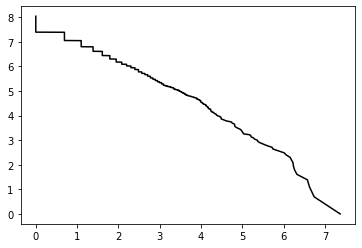

In [55]:
plot_zipf('alice_new.txt')

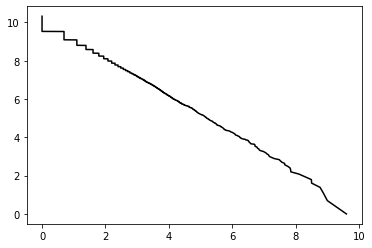

In [56]:
plot_zipf('ulysses.txt')

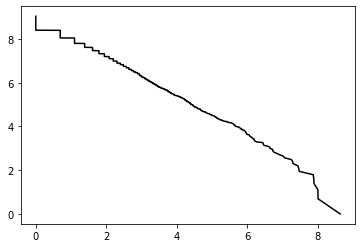

In [57]:
plot_zipf('sherlock.txt')

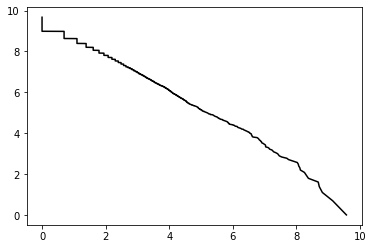

In [58]:
plot_zipf('canterbury.txt')